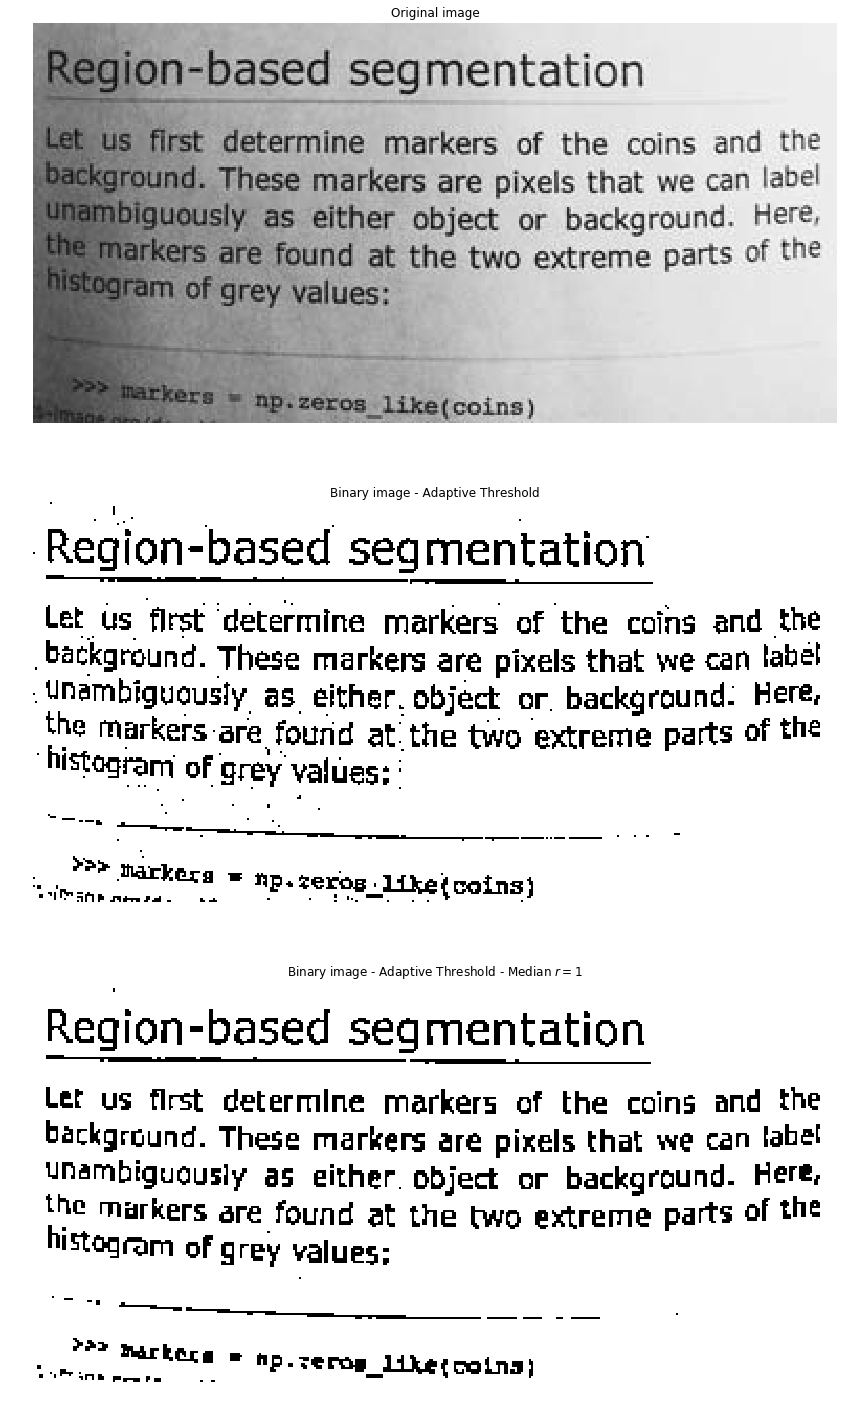

In [1]:
# Convert image to binary image

from skimage import data, filters
from skimage.filters.rank import median
from skimage.morphology import disk, square
import matplotlib.pyplot as plt

image = data.page()

#Adaptive threshold
block_size = 15
adaptive_thresh = filters.threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 25))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Original image")

ax[1].imshow(binary_adaptive, cmap=plt.cm.gray)
ax[1].set_title("Binary image - Adaptive Threshold")

r = 1
binary_image = median(binary_adaptive, disk(r))
ax[2].imshow(binary_image, cmap=plt.cm.gray)
ax[2].set_title("Binary image - Adaptive Threshold - Median $r=%d$"%(r))

for a in ax:
    a.axis('off')
plt.show()

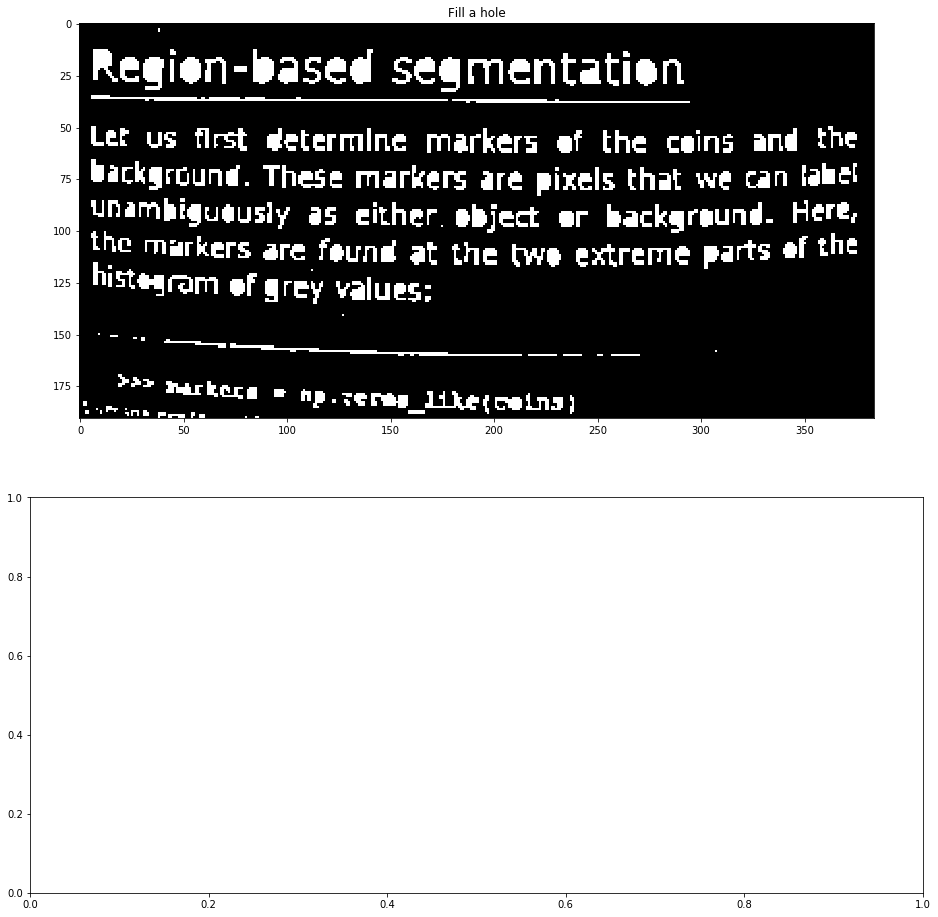

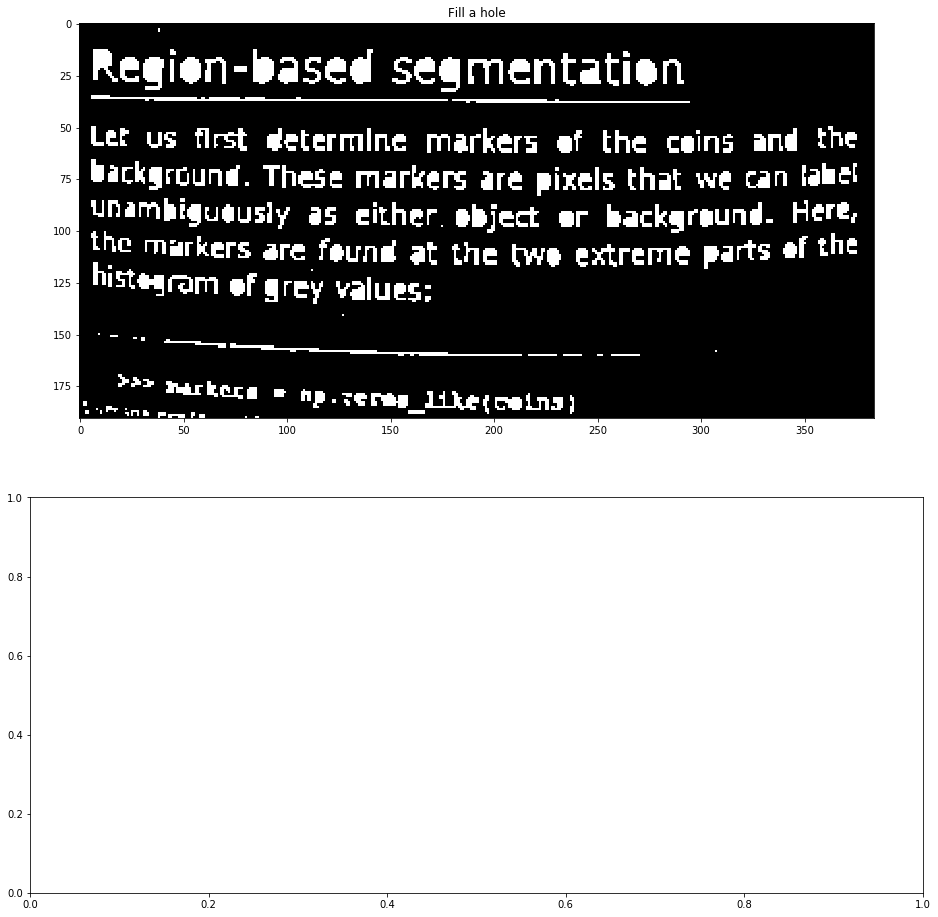

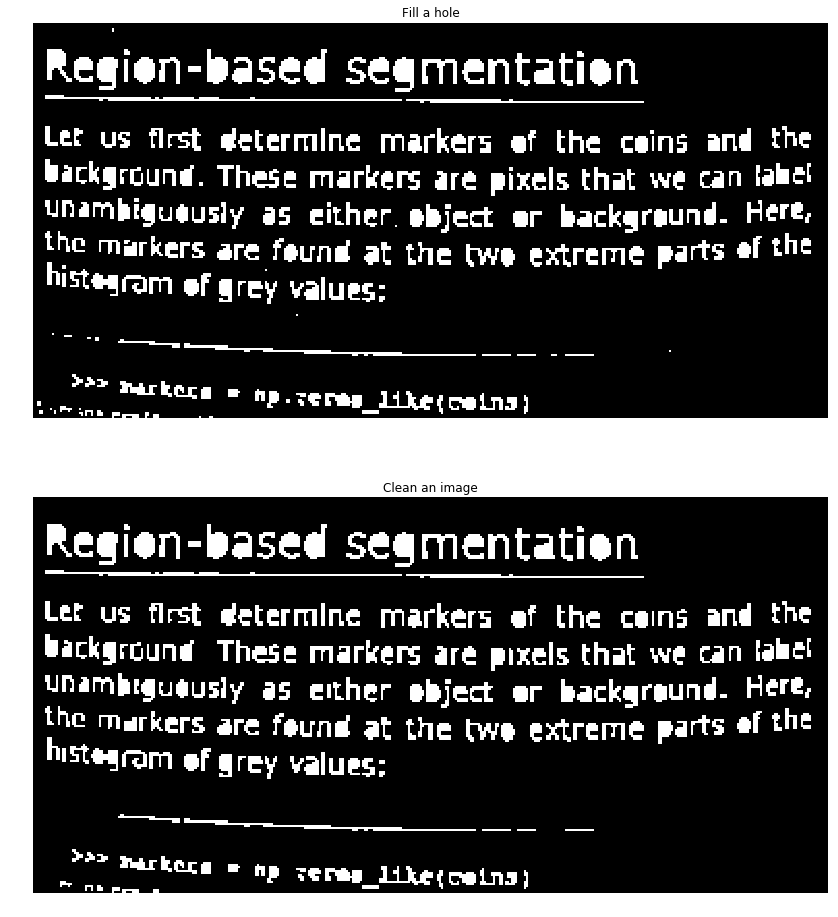

In [4]:
# Cleaning an image

from skimage import io
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk, square
from skimage.filters.rank import median

r = 1
img_rmnoise = median(binary_adaptive, disk(r))

# fill a hole
fill_text = ndi.binary_fill_holes(np.invert(img_rmnoise))

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(16, 16))
axes[0].imshow(fill_text, cmap=plt.cm.gray)
axes[0].set_title("Fill a hole")

label_objects, nb_labels = ndi.label(fill_text)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 5
mask_sizes[0] = 0
text_cleaned = mask_sizes[label_objects]

axes[1].imshow(text_cleaned, cmap=plt.cm.gray)
axes[1].set_title("Clean an image")

for a in axes:
    a.axis('off')
    
plt.show()

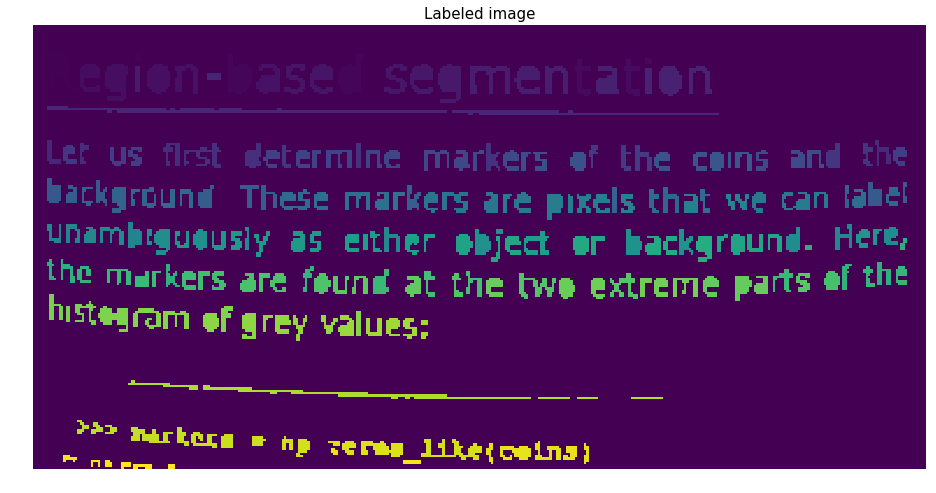

In [5]:
# image labeling
from scipy import ndimage as ndi

labeled_text, _ = ndi.label(text_cleaned)

fig, axes = plt.subplots(ncols=1, figsize=(16, 16))
axes.axis('off')
plt.imshow(labeled_text)
plt.title("Labeled image",fontsize=15)
plt.show()

number of objects 248


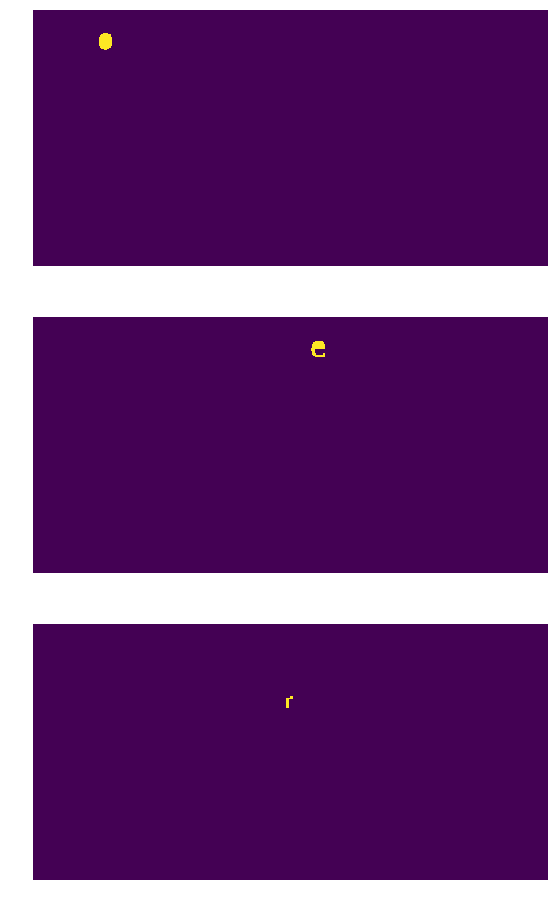

In [6]:
print "number of objects", labeled_text.max()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,16))

axes[0].imshow(labeled_text == 10)
axes[1].imshow(labeled_text == 20)
axes[2].imshow(labeled_text == 55)

for a in axes:
    a.axis('off')
plt.show()

Character segmentation


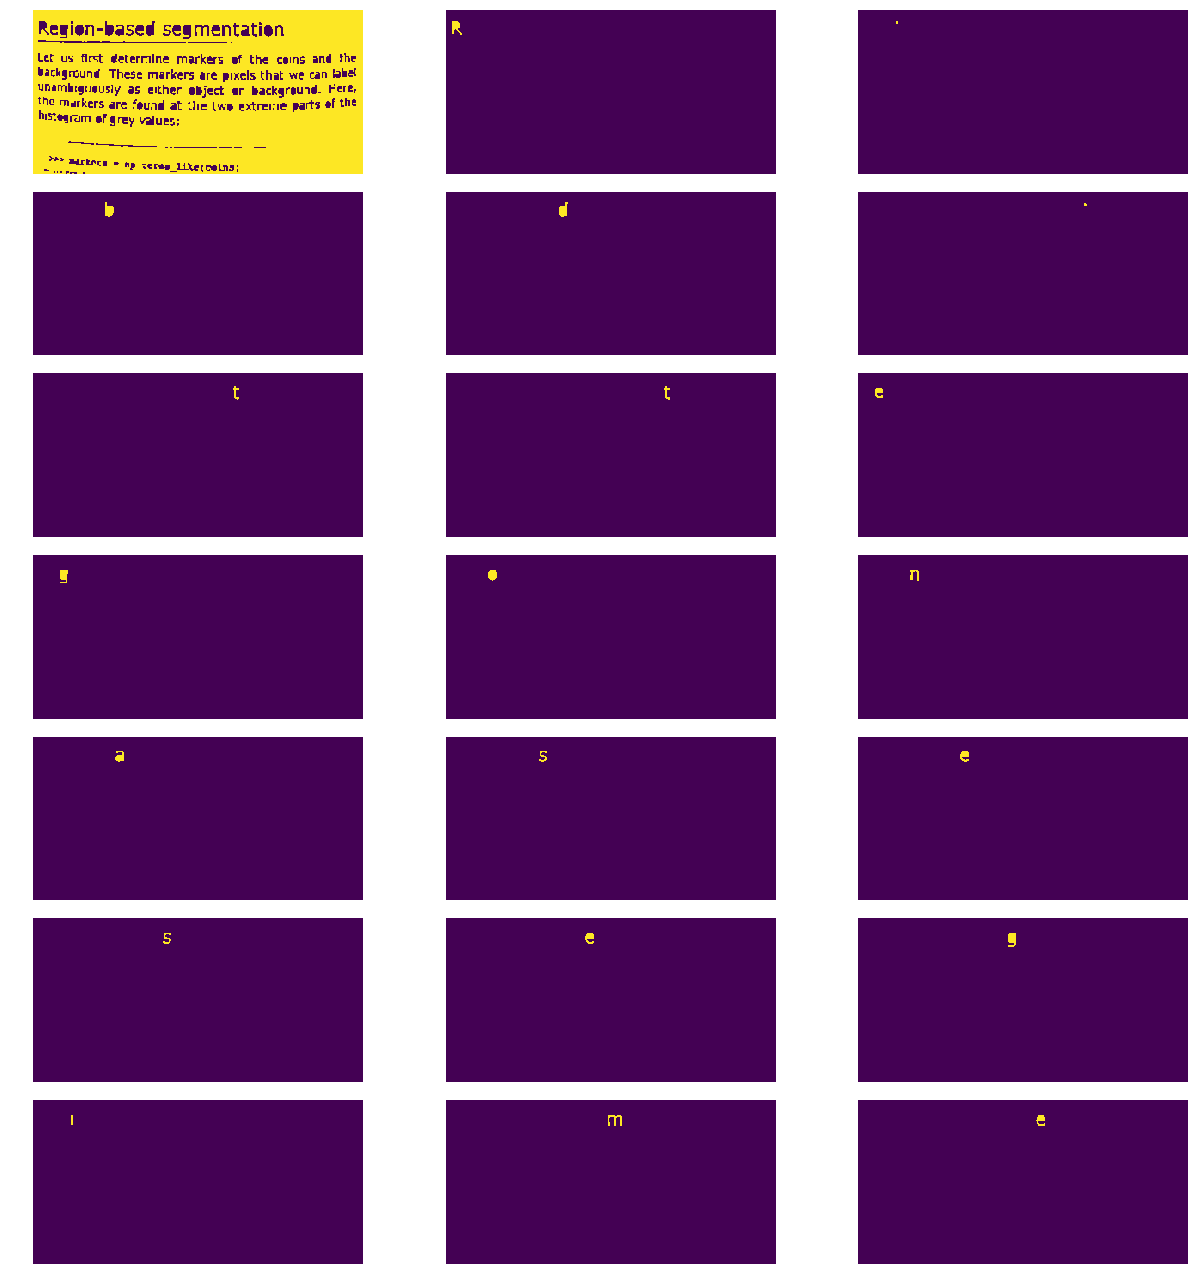

In [7]:
# character segmentation

print("Character segmentation")
rows = 7
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 18), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx in(range(0,rows*cols)):    
    ax[idx].imshow((labeled_text == idx), interpolation='nearest')
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

('max value', True)
('type', <type 'numpy.ndarray'>)
('r', array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]))
('c', array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]))


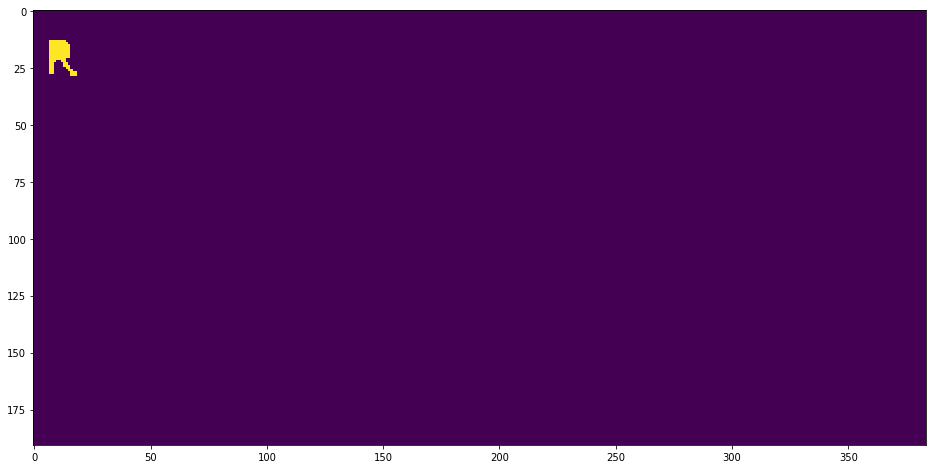

In [8]:
plt.figure(figsize = (16,8))
img = labeled_text == 1;

print("max value", img.max())
print("type", type(img))

r, = np.where(img.sum(axis=1) > 1)
c, = np.where(img.sum(axis=0) > 1)

print("r",r)
print("c",c)

plt.imshow(img, aspect='auto')
plt.show()

('r', array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]))
('c', array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]))


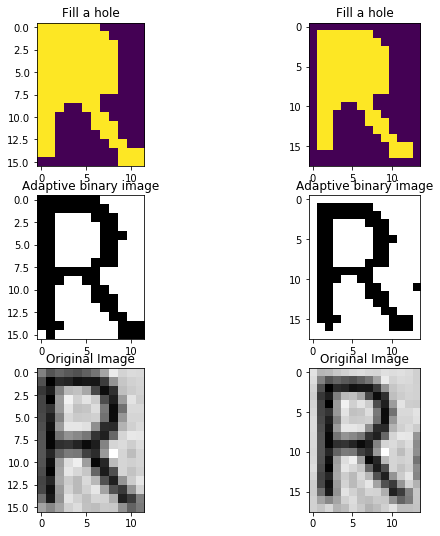

In [9]:
import matplotlib.pyplot as plt
print("r",r)
print("c",c)

rows = 3
cols = 2

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(9, 9))
axes[0,0].imshow(img[r.min():(r.max()+1), c.min():(c.max()+1)], interpolation='nearest')
axes[0,0].set_title("Fill a hole")
axes[0,1].imshow(img[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)], interpolation='nearest')
axes[0,1].set_title("Fill a hole")

axes[1,0].imshow(binary_adaptive[r.min():(r.max()+1), c.min():(c.max()+1)], cmap=plt.cm.gray)
axes[1,0].set_title("Adaptive binary image")
axes[1,1].imshow(binary_adaptive[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)], cmap=plt.cm.gray)
axes[1,1].set_title("Adaptive binary image")

axes[2,0].imshow(image[r.min():(r.max()+1), c.min():(c.max()+1)], cmap=plt.cm.gray)
axes[2,0].set_title("Original Image")
axes[2,1].imshow(image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)], cmap=plt.cm.gray)
axes[2,1].set_title("Original Image")

plt.show()
